<a href="https://colab.research.google.com/github/nuramaliasusanti/nuramaliasusanti/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS DECISION RESEARCH**

Melakukan *churn analysis* (analisis terhadap menurunnya pelanggan yang membeli kembali) terhadap produk di salah satu cabang perusahaan sehingga bisa memberikan rekomendasi dan strategi untuk menurunkan *churn* dari pelanggan. 
Perusahaan yang akan dianalisis adalah perusahaan yang menjual berbagai kebutuhan olahraga dan sudah mulai beroperasi sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini. 
Adapun *customer* termasuk sudah bukan disebut pelanggan lagi (*churn*) ketika sudah tidak bertransaksi lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  

# ***DATA PREPARATION : Melakukan ETL (Extract, Transform, Load) Data***

**IMPORTING DATA**

In [ ]:
import pandas as pd     # Import library       

In [ ]:
data_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep = ';')      # Import data ke python environment dan mengubah formatnya menjadi kolom dengan fungsi sep

In [ ]:
# Melakukan inspeksi pada dataset
data_retail.head()      # Mengecek gambaran isi data dengan fungsi .head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
data_retail.info()      # Melihat informasi jumlah kolom, NaN, dan tipe setiap feature pada data dengan fungsi .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


**Note** : Terlihat bahwa dua kolom yang menunjukkan terjadinya transaksi (kolom *First_Transaction* dan *Last_Transaction*) tidak bertipe datetime

**CLEANSING DATA**

In [ ]:
# Mengubah tipe data

# Kolom First_Transaction
data_retail['First_Transaction'] = pd.to_datetime(data_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')     # Mengubah tipe data integer menjadi datetime dengan fungsi pd.to_datetime()
                                                                                                                                                                                          # Fitur unit untuk menentukan sejauh mana data berubah jauh dari aslinya
                                                                                                                                                                                          # Fitur origin untuk menentukan format isi data 

# Kolom Last_Transaction
data_retail['Last_Transaction'] = pd.to_datetime(data_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [ ]:
# Menghapus kolom yang tidak diperlukan
del data_retail['no']     # Menghapus kolom  dengan fungsi del
del data_retail['Row_Num']

In [ ]:
# Cek dataframe baru setelah dilakukan modifikasi
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [ ]:
data_retail.info()      # Informasi dataset untuk mengetahui perubahan pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.6+ MB


**Note** : Data pada kolom yang menunjukkan tanggal transaksi telah berubah format dan tipe datanya menjadi datetime serta hanya ditampilkan kolom yang berguna untuk proses analisis

***CHURN CUSTOMERS***

In [ ]:
# Menemukan transaksi paling terakhir
print(max(data_retail['Last_Transaction']))     # Pengecekan transaksi terakhir dengan fungsi max()

2019-02-01 23:57:57.286000013


**Note** : Data menunjukkan transaksi terakhir tercatat pada 01 Februari 2019. Sehingga customers dikategorikan sebagai *Churn Customers* jika sudah tidak melakukan transaksi selama 6 bulan terakhir yang berarti terhitung sejak 01 Agustus 2018

In [ ]:
# Mengklasifikasikan status customers (Churn or Not) dengan boolean
data_retail.loc[data_retail['Last_Transaction'] <= '2018-08-01', 'Churn_Cust'] = True     # Churn_Cust bernilai True jika Last_Transaction tercatat sebelum 01 Agustus 2018
data_retail.loc[data_retail['Last_Transaction'] > '2018-08-01', 'Churn_Cust'] = False      # Churn_Cust bernilai False jika Last_Transaction tercatat setelah 01 Agustus 2018

In [ ]:
# Cek dataframe baru setelah dilakukan modifikasi
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


In [ ]:
data_retail.info()      # Informasi dataset untuk mengetahui perubahan pada kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   Churn_Cust                  100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


**LABEL ENCODING DATA**

Mengubah kolom Churn_Cust yang semula bertipe object menjadi tipe numerik agar memudahkan saat modellling data

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data_retail['Churn_Cust'] = le.fit_transform(data_retail['Churn_Cust'])
print(le.classes_)
print(np.sort(data_retail['Churn_Cust'].unique()))

[False True]
[0 1]


In [ ]:
# Cek dataframe setelah dilakukan modifikasi
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0


**Note** : Dataset telah berhasil dimodifikasi yang selanjutnya bisa melakukan analisis melalui visualisasi data mengenai beberapa aspek yang ingin diketahui *insight* data nya

# ***DATA VISUALIZATION***

**CUSTOMER ACQUISITION BY YEAR**

In [ ]:
import matplotlib.pyplot as plt       # Import library visualisasi data

In [ ]:
# Inisiasi feature/kolom tambahan
data_retail['Year_First_Transaction'] = data_retail['First_Transaction'].dt.year      # Kolom baru transaksi pertama dengan format tahun
data_retail['Year_Last_Transaction'] = data_retail['Last_Transaction'].dt.year      # Kolom baru transaksi terakhir dengan format tahun

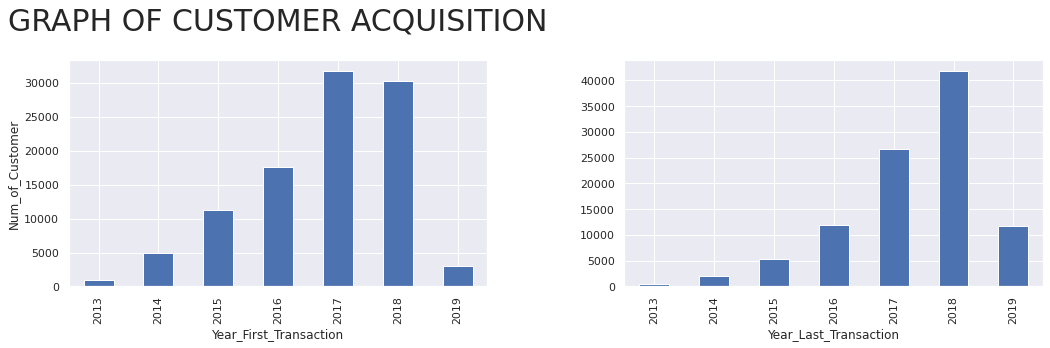

In [ ]:
plt.figure(figsize = (15,5))      # Mengatur ukuran grafik

# Grafik Pertama : Year_First_Transaction
dr_firstyear = data_retail.groupby(['Year_First_Transaction'])['Customer_ID'].count()
plt.subplot(1,2,1)
dr_firstyear.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')

plt.title('GRAPH OF CUSTOMER ACQUISITION', pad = 30, fontsize = 30)     # Kustomisasi judul

#Grafik Kedua : Year_Last_Transaction
dr_lastyear = data_retail.groupby(['Year_Last_Transaction'])['Customer_ID'].count()
plt.subplot(1,2,2)
dr_lastyear.plot(x='Year_Last_Transaction', y='Customer_ID', kind='bar')
plt.xlabel('Year_Last_Transaction')

plt.tight_layout()
plt.show()

**TRANSACTION BY YEAR**

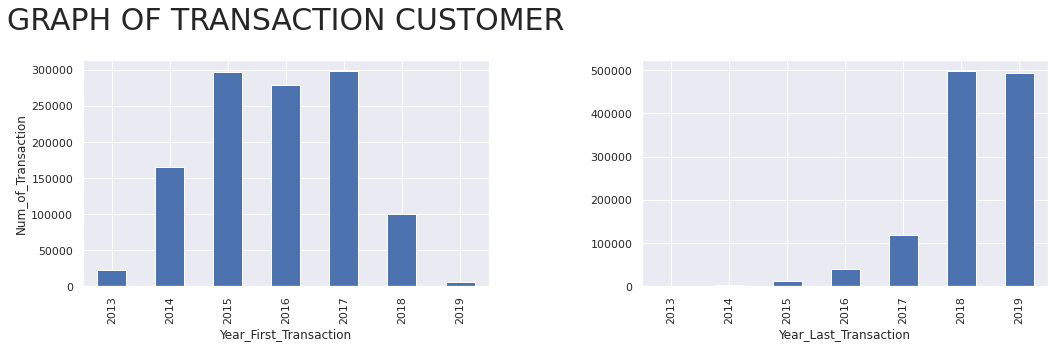

In [ ]:
plt.figure(figsize = (15,5))      # Mengatur ukuran grafik

# Grafik Pertama : Year_First_Transaction
dr_firstyear = data_retail.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
plt.subplot(1,2,1)
dr_firstyear.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')

plt.title('GRAPH OF TRANSACTION CUSTOMER', pad = 30, fontsize = 30)     # Kustomisasi judul

# Grafik Kedua : Year_Last_Transaction
dr_lastyear = data_retail.groupby(['Year_Last_Transaction'])['Count_Transaction'].sum()
plt.subplot(1,2,2)
dr_lastyear.plot(x='Year_Last_Transaction', y='Count_Transaction', kind='bar')
plt.xlabel('Year_Last_Transaction')

plt.tight_layout()
plt.show()

**AVERAGE TRANSACTION AMOUNT BY YEAR**

In [ ]:
import seaborn as sns

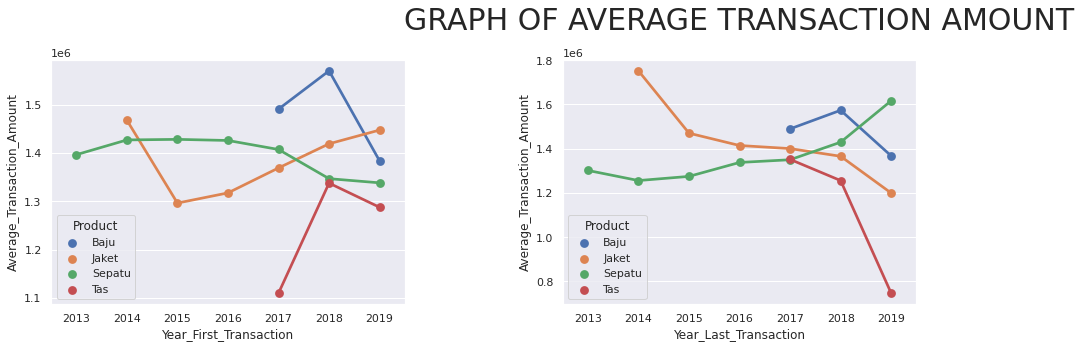

In [ ]:
plt.figure(figsize = (15,5))      # Mengatur ukuran grafik

# Grafik Pertama : Year_First_Transaction
plt.subplot(1,2,1)
sns.pointplot(data = data_retail.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')



# Grafik Pertama : Year_First_Transaction
plt.subplot(1,2,2)
sns.pointplot(data = data_retail.groupby(['Product', 'Year_Last_Transaction']).mean().reset_index(), 
              x='Year_Last_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')

plt.title('GRAPH OF AVERAGE TRANSACTION AMOUNT', pad = 30, fontsize = 30)
plt.tight_layout()
plt.show()

**PROPORTION CHURN BY PRODUCT**

In [ ]:
# Melakukan pivot data dengan fungsi pivot_table
dr_piv = data_retail.pivot_table(index='Churn_Cust',
                                                  columns='Product',
                                                  values='Customer_ID',
                                                  aggfunc='count',
                                                  fill_value=0)
print(dr_piv)

Product     Baju  Jaket  Sepatu   Tas
Churn_Cust                           
0           1268  11123   16064  4976
1           2144  23827   33090  7508


In [ ]:
# Mendapatkan Proportion Churn by Product
plot_product = dr_piv.count().sort_values(ascending=False).head(5).index
print(plot_product)

Index(['Tas', 'Sepatu', 'Jaket', 'Baju'], dtype='object', name='Product')


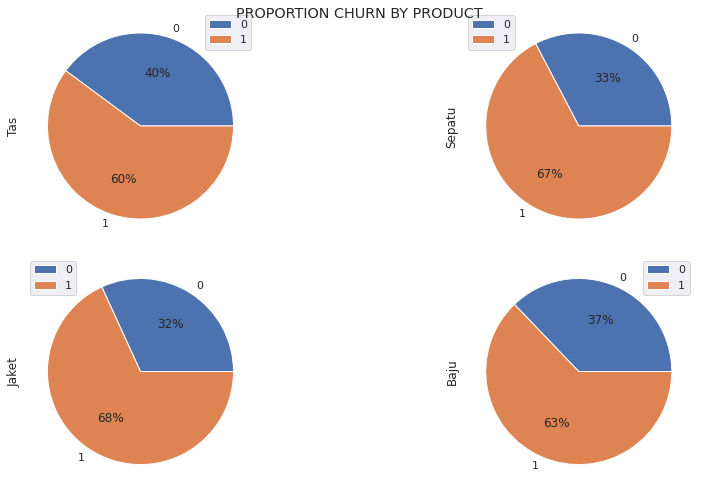

In [ ]:
# Plot data menggunakan Pie Chart
dr_piv = dr_piv.reindex(columns=plot_product)     # Mengganti index kolom pada dataframe dr_piv dengan plot_product
dr_piv.plot.pie(subplots=True, figsize=(15,7), layout=(-1,2), autopct='%1.0f%%', title='PROPORTION CHURN BY PRODUCT')      # Kustomisasi pie chart
plt.tight_layout()
plt.show()

**CUSTOMER DISTRIBUTION BY COUNT TRANSACTION GROUP**

Data jumlah transaksi akan dikategorikan terlebih dahulu ke dalam beberapa rentang: 1, 2-3, 4-6, 7-10, >10

In [ ]:
# Kategorisasi jumlah transaksi
def func(row):
      if row['Count_Transaction'] == 1:
        val = '1'
      elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2-3'
      elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '4-6'
      elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val = '7-10'
      else:
        val = '>10'
      return val

In [ ]:
# Tambahkan kolom baru pada dataframe
data_retail['Count_Transaction_Group'] = data_retail.apply(func, axis=1)
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,>10
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,>10
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,>10
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,>10
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,>10


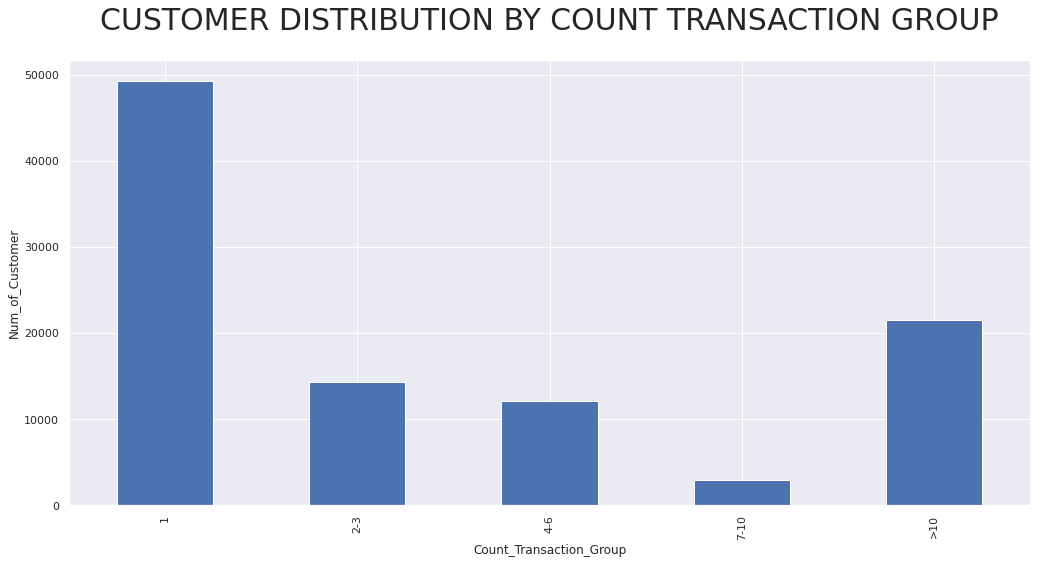

In [ ]:
# Plot data menggunakan bar chart
plt.figure(figsize=(15,8))
dr_year = data_retail.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
dr_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.title('CUSTOMER DISTRIBUTION BY COUNT TRANSACTION GROUP', pad=30, fontsize=30)
plt.tight_layout()
plt.show()

**CUSTOMER DISTRIBUTION BY AVERAGE TRANSACTION AMOUNT**

Data rata-rata besarnya transaksi akan dikategorikan terlebih dahulu ke dalam beberapa rentang: 100.000 - 250.000, >250.000 - 500.000, >500.000 - 750.000, >750.000 - 1.000.000, >1.000.000 - 2.500.000, >2.500.000 - 5.000.000, >5.000.000 - 10.000.000, dan >10.000.000

In [ ]:
# Kategorisasi rata-rata besar transaksi
def function(row):
      if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val = '1. 100.000 - 250.000'
      elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. >250.000 - 500.000'
      elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
      elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
      elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
      elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
      elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
         val = '7. >5.000.000 - 10.000.000'
      else:
        val = '8. >10.000.000'
      return val

In [ ]:
# Tambahkan kolom baru pada dataframe
data_retail['Avg_Transaction_Amount_Group'] = data_retail.apply(function, axis=1)
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Avg_Transaction_Amount_Group
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,>10,5. >1.000.000 - 2.500.000
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,>10,5. >1.000.000 - 2.500.000
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,>10,2. >250.000 - 500.000
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,>10,3. >500.000 - 750.000
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,>10,5. >1.000.000 - 2.500.000


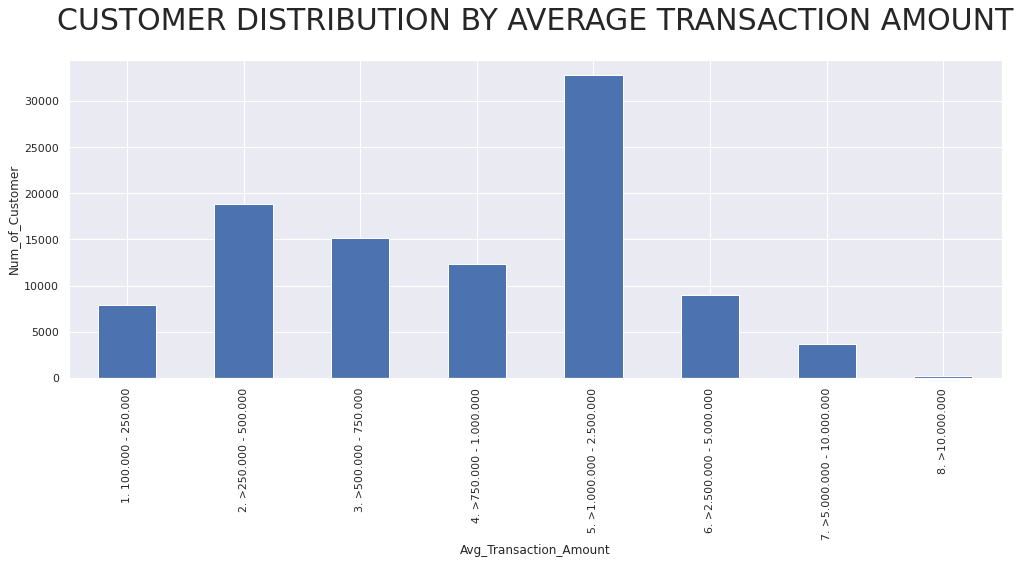

In [ ]:
# Plot data menggunakan bar chart
plt.figure(figsize=(15,8))
dr_year = data_retail.groupby(['Avg_Transaction_Amount_Group'])['Customer_ID'].count()
dr_year.plot(x='Avg_Transaction_Amount_Group', y='Customer_ID', kind='bar')
plt.xlabel('Avg_Transaction_Amount')
plt.ylabel('Num_of_Customer')
plt.title('CUSTOMER DISTRIBUTION BY AVERAGE TRANSACTION AMOUNT', pad=30, fontsize=30)
plt.tight_layout()
plt.show()

# ***ANALYSIS CONCLUSION*** 

Berdasarkan analisis yang telah dilakukan, kesimpulan yang didapatkan antara lain :
- Jumlah pelanggan baru semakin menurun drastis sejak tahun 2017 dengan perbedaan jumlah customer yang sangat jauh menurun dari tahun sebelumnya dan terakhir tercatat kurang dari 5000 pelanggan baru 
- Lebih dari 40 ribu customer dengan 500 ribu transaksi melakukan transaksi terakhir mereka di tahun 2018 dan tercatat sebagai churn customer di tahun berikutnya
- Jumlah churn customer mendominasi di setiap produknya dengan perolehan lebih dari 60%
- Hampir mendekati angka 50 ribu customer hanya melakukan satu kali transaksi  dengan rata-rata jumlah transaksi terbanyak terdapat pada rentang 1 juta sampai 2,5 juta dan hanya 50% yang bertransaksi lebih dari 10 kali 
- Produk yang paling menarik perhatian customer untuk  bertransaksi pertama kali adalah Baju dengan perolehan rata-rata jumlah transaksi tertinggi terjadi di tahun 2018 didukung dengan rendahnya transaksi terakhir yang dilakukan customer pada tahun berikutnya. Hal ini harus dipertimbangkan oleh divisi terkait untuk melakukan pengembangan agar tetap mempertahankan dan bisa meningkatkan pendapatan pada produk tersebut
-Tas menjadi produk yang paling sedikit menarik perhatian customer untuk membelanjakan uangnya. Masalah ini perlu ditinjau kembali oleh divisi terkait apakah akan melakukan inovasi atau tindakan lain agar tidak terjadi masalah yang sama di tahun berikutnya.
- Besarnya churn customer harus menjadi hal yang sangat perlu diperhatikan karena menjadi pengaruh terbesar dalam perolehan jumlah transaksi customer setiap tahunnya. Hal ini bisa diatasi dengan membuat promosi layanan yang jauh lebih menarik dan tepat sasaran terutama demi mencegah berkurangnya pelanggan dan menumbuhkan tingkat loyalitasnya dengan produk yang ditawarkan.

# ***DATA MODELLING***

**LABEL ENCODING DATA**

Mengubah kolom Product dan Avg_Transaction_Amount_Group yang semula bertipe object menjadi tipe numerik agar memudahkan saat modellling data

In [ ]:
# Kolom Product
le = LabelEncoder()
data_retail['Product'] = le.fit_transform(data_retail['Product'])
print(le.classes_)
print(np.sort(data_retail['Product'].unique()))

['Baju' 'Jaket' 'Sepatu' 'Tas']
[0 1 2 3]


In [ ]:
# Kolom Avg_Transaction_Amount_Group
le = LabelEncoder()
data_retail['Avg_Transaction_Amount_Group'] = le.fit_transform(data_retail['Avg_Transaction_Amount_Group'])
print(le.classes_)
print(np.sort(data_retail['Avg_Transaction_Amount_Group'].unique()))

['1. 100.000 - 250.000' '2. >250.000 - 500.000' '3. >500.000 - 750.000'
 '4. >750.000 - 1.000.000' '5. >1.000.000 - 2.500.000'
 '6. >2.500.000 - 5.000.000' '7. >5.000.000 - 10.000.000' '8. >10.000.000']
[0 1 2 3 4 5 6 7]


In [ ]:
# Cek dataframe setelah dilakukan modifikasi
data_retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Avg_Transaction_Amount_Group
0,29531,1,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,>10,4
1,29531,2,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,>10,4
2,141526,3,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,>10,1
3,141526,1,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,>10,2
4,37545,2,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,>10,4


In [ ]:
# Cek informasi dataframe
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Customer_ID                   100000 non-null  int64         
 1   Product                       100000 non-null  int64         
 2   First_Transaction             100000 non-null  datetime64[ns]
 3   Last_Transaction              100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount    100000 non-null  int64         
 5   Count_Transaction             100000 non-null  int64         
 6   Churn_Cust                    100000 non-null  int64         
 7   Year_First_Transaction        100000 non-null  int64         
 8   Year_Last_Transaction         100000 non-null  int64         
 9   Count_Transaction_Group       100000 non-null  object        
 10  Avg_Transaction_Amount_Group  100000 non-null  int64         
dtypes: datetime64[

**CORRELATION BETWEEN VARIABLES**

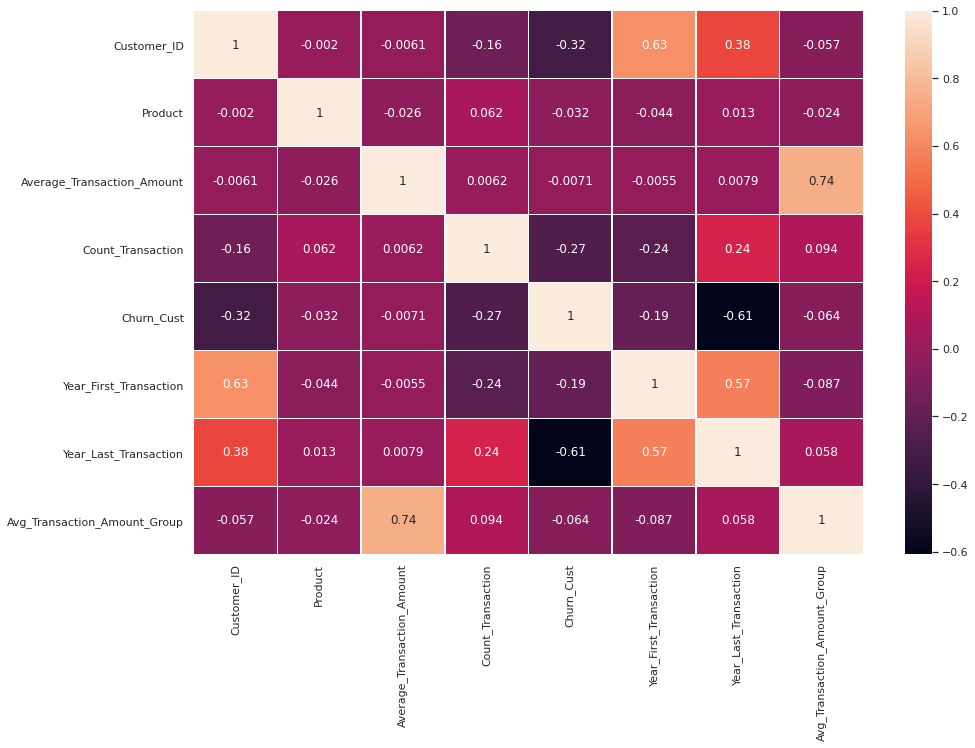

In [ ]:
# Correlation between variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(data_retail.corr(), linewidths=.5, annot=True)

**Note** : Korelasi antara label churn_Cust dan variabel lain adalah negatif. Variabel seperti jumlah transaksi, produk, dan transaksi tahun pertama adalah beberapa korelasi teratas.

MELAKUKAN MODELLING DATA MENGGUNAKAN STATISTIKA DASAR

**GET FEATURE COLUMNS & TARGET**

Menentukan *feature columns* dari dataset yang dimiliki diantaranya kolom  *Avg_Transaction_Amount, Count_Transaction,* dan *Year_Diff*. *Year_Diff* disini adalah rentang waktu terhitung sejak transaksi pertama sampai transaksi terakhir dari setiap pelanggan. Selain itu, akan ditentukan *target column* sesuai permasalahan yakni kondisi churn atau tidak (kategorikal)

In [ ]:
# Membuat kolom baru Year_Diff
data_retail['Year_Diff'] = data_retail['Year_Last_Transaction'] - data_retail['Year_First_Transaction']
data_retail.head()      # Cek gambaran isi dataset terbaru

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn_Cust,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Avg_Transaction_Amount_Group,Year_Diff
0,29531,1,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,>10,4,2
1,29531,2,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,>10,4,4
2,141526,3,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,>10,1,2
3,141526,1,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,>10,2,2
4,37545,2,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,>10,4,3


In [ ]:
# List feature columns
feature_col = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

In [ ]:
# Assign feature columns to variable X
X = data_retail[feature_col]
print('Feature Columns\n', X.head())      # Cek gambaran feature columns

# Assign target/label column to variable y
y = data_retail['Churn_Cust']
print('\nTarget Column\n', y.head())      # Cek gambaran target column

Feature Columns
    Average_Transaction_Amount  Count_Transaction  Year_Diff
0                     1467681                 22          2
1                     1269337                 41          4
2                      310915                 30          2
3                      722632                 27          2
4                     1775036                 25          3

Target Column
 0    0
1    0
2    0
3    0
4    0
Name: Churn_Cust, dtype: int64


**SPLIT TRAINING & TEST DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split training & test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)     # Membagi train & test dataset dengan proporsi training dan test dataset 75:25 dari jumlah seluruh data

# Cek ukuran training & test dataset
print('X_train\n', X_train.shape)
print('\ny_train\n', y_train.shape)
print('\nX_test\n', X_test.shape)
print('\ny_test\n', y_test.shape)

X_train
 (75000, 3)

y_train
 (75000,)

X_test
 (25000, 3)

y_test
 (25000,)


# **COMPARE MODELS**

Membuat model dengan menggunakan machine learning tipe *Supervised Learning* dan melakukan eksperimen dengan beberapa algoritma model yang sesuai untuk kolom target/output data sudah diketahui dan merupakan numerical variable yang tergolong categorical/discrete value (True/False or 1/0) untuk menemukan model yang paling tepat dalam prediksi

***MODEL 1 : LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression       # Import library model

In [ ]:
logreg = LogisticRegression()       # Inisiasi model
logreg.fit(X_train, y_train)        # Fit the model to training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**- Performa Model pada Training Data**








In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_train_pred = logreg.predict(X_train)        # Predict model to training dataset

In [ ]:
print(classification_report(y_train, y_train_pred))       # Performa prediksi terhadap real label dari train dataset

              precision    recall  f1-score   support

           0       0.31      0.00      0.00     25100
           1       0.67      1.00      0.80     49900

    accuracy                           0.67     75000
   macro avg       0.49      0.50      0.40     75000
weighted avg       0.55      0.67      0.53     75000



**- Performa Model pada Test Data**



In [ ]:
y_test_pred = logreg.predict(X_test)        # Predict model to test data

In [ ]:
print(classification_report(y_test, y_test_pred))       # Performa prediksi terhadap real label dari test dataset

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      8331
           1       0.67      1.00      0.80     16669

    accuracy                           0.67     25000
   macro avg       0.46      0.50      0.40     25000
weighted avg       0.53      0.67      0.53     25000



***MODEL 2 : RANDOM FOREST CLASSIFIER***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randfor = RandomForestClassifier()        # Inisiasi model
randfor.fit(X_train, y_train)       # Fit the model to training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**- Performa Model pada Training Data**

In [ ]:
ytrain_pred = randfor.predict(X_train)        # Predict model to training dataset

In [ ]:
print(classification_report(y_train, ytrain_pred))       # Performa prediksi terhadap real label dari train dataset

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25100
           1       1.00      1.00      1.00     49900

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



**- Performa Model pada Test Data**

In [ ]:
ytest_pred = randfor.predict(X_test)        # Predict model to test data

In [ ]:
print(classification_report(y_test, ytest_pred))       # Performa prediksi terhadap real label dari test dataset

              precision    recall  f1-score   support

           0       0.49      0.50      0.49      8331
           1       0.75      0.74      0.74     16669

    accuracy                           0.66     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.66      0.66      0.66     25000



***MODEL 3 : GRADIENT BOOSTING CLASSIFIER***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()        # Inisiasi model
gb.fit(X_train, y_train)       # Fit the model to training data

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**- Performa Model pada Training Data**

In [ ]:
ytrainpred = gb.predict(X_train)        # Predict model to training dataset

In [ ]:
print(classification_report(y_train, ytrainpred))       # Performa prediksi terhadap real label dari train dataset

              precision    recall  f1-score   support

           0       0.77      0.45      0.57     25100
           1       0.77      0.93      0.84     49900

    accuracy                           0.77     75000
   macro avg       0.77      0.69      0.70     75000
weighted avg       0.77      0.77      0.75     75000



**- Performa Model pada Test Data**

In [ ]:
ytestpred = gb.predict(X_test)        # Predict model to test data

In [ ]:
print(classification_report(y_test, ytestpred))       # Performa prediksi terhadap real label dari test dataset

              precision    recall  f1-score   support

           0       0.77      0.45      0.57      8331
           1       0.77      0.93      0.85     16669

    accuracy                           0.77     25000
   macro avg       0.77      0.69      0.71     25000
weighted avg       0.77      0.77      0.75     25000



**Note :** Dalam kasus ini, hasil *Accuracy* bukanlah metrik yang baik untuk mengevaluasi model mana yang paling baik karena *Accuracy* mengukur keakuratan model secara keseluruhan, dan dikarenakan dataset yang digunakan merupakan kumpulan data tidak seimbang (proporsi data churn dan tidak churn yang berbeda), hal itu mengakibatkan peningkatan (increase) yang tidak mencerminkan hasil positif dari data. Jadi, keefektifan model yang digunakan akan dilihat dari metrik lain, yaitu nilai *Precision* dan *Recall*. 

***Precision*** merupakan persentase prediksi yang benar untuk label dari total yang diprediksi dengan label tersebut, yaitu seberapa baik model memprediksi label.

***Recall*** adalah persentase prediksi yang benar untuk label dari total entri yang benar-benar memiliki label tersebut, yaitu, seberapa baik model memprediksi label jika itu adalah label yang benar.

# ***MODEL CONCLUSION***

Berdasarkan hasil perbandingan diantara ketiga model tersebut, ***Gradient Boosting Classifier*** menunjukkan performansi yang paling baik diantara model lainnya. Hal ini ditunjukkan dengan nilai *Accuracy* 77% (terbesar), ditambah dengan perolehan *Precision* model untuk semua labelnya juga 77% dan *Recall* point untuk label Churn sebesar 95%. Sehingga dapat dikatakan model ini cukup baik digunakan untuk memprediksi Churn Customers. Gradient Boosting Classifier juga baik digunakan untuk dataset yang besar. 

Untuk masalah prediksi, perlu meluangkan waktu di langkah Data Pre-Processing. Saat menganalisis kumpulan data, mungkin untuk membuat beberapa asumsi yang dapat meningkatkan kinerja model. Bergantung pada ukuran kumpulan data, hal ini dapat memakan waktu lama, namun, ini adalah langkah yang sangat penting untuk kualitas model. Akan tetapi, alangkah baik jika kemampuan prediksi model ditingkatkan dengan menerapkan model lain yang memiliki performansi lebih baik. 